In [1]:
import numpy as np
import fields
from astropy import units as u
pdfs=False               # save pdfs of the force densities

In [7]:
λ0 = 1310*u.nm;   # vacuum wavelength of the laser  
ε1 = 4.3;       # [ε0] permittivity of silicon nitride at 20°C valid in λ0∈(750, 1700)nm [https://refractiveindex.info/?shelf=main&book=Si3N4&page=Vogt-2.13]
ε2 = 1.7;       # [ε0] permittivity of distilled water at 20°C valid in λ0∈(750, 1700)nm [https://refractiveindex.info/?shelf=main&book=H2O&page=Kedenburg]
fields.material(ε_in=ε1,ε_out=ε2,μ_in=1,μ_out=1) # set the material parameters (note that host medium parameteres have to be real)
r0 = (λ0*fields.jn_zeros(0,1)[0])/(2*np.pi*fields.n1) # radius of cylinder (radius of the fibre core)

a  = .3*u.um   # particle radius

# calculate polarisabilities from particle material properties (note that particle material parameters can be complex, unlike host medium parameters)
εp = 2.5 + 0j       # particle permittivity
μp = 1 + 0j         # particle permeability
κp = 0.5 + 0j       # particle chirality
(αe,αm,αc)=fields.get_α(λ0,a.to(u.m),εp,μp,κp)

# units of polarisabilities to show
unit=u.Angstrom**3
# unit=u.nm**3

# # radiation correction for static particle polarisabilities
# a  = 50*u.nm   # particle radius
# αe0 = 2.56e8*unit
# αm0 = 1e-5*αe0
# αc0 = 2.72e7*unit
# (αe,αm,αc) = fields.radiation_correction(λ0,αe0,αm0,αc0)


print("r₀ = ",f"{r0:.3g}", "or", f"{r0/λ0:.3g} λ0")
print("a  = ",f"{a:.3g}", "or", f"{a/λ0:.3g} λ0")
print("αe = ", f"{(αe.to(unit)).value:+.3g} {(αe.to(unit)).unit:unicode}")
print("αm = ", f"{(αm.to(unit)).value:+.3g} {(αm.to(unit)).unit:unicode}")
print("αc = ", f"{(αc.to(unit)).value:+.3g} {(αc.to(unit)).unit:unicode}")
λ0 = λ0.to(u.m).value; r0 = r0.to(u.m).value; a = a.to(u.m).value; α = (αe.to(u.m**3).value,αm.to(u.m**3).value,αc.to(u.m**3).value)

r₀ =  242 nm or 0.185 λ0
a  =  0.3 um or 0.000229 um / nm λ0
αe =  +3.45e+10+2.44e+09j Å³
αm =  +5.14e+08-1.14e+10j Å³
αc =  +2.12e+10+8.65e+09j Å³


In [3]:
ℓ    = 1       # azimuthal mode number related to the total angular momentum J_z = ℓW/ω
mode = 0       # mode number n such that the spin angular momentum in the high radius limit k₀r₀≫1 is S_z = (-)ⁿW/ω and there is nᵣ=n/2-(1-(-1)ⁿ)/4 radial nodes in the energy density

In [4]:
res=int(450)            # resolution of the plot
window=2.1*(r0+a)/λ0    # size of the window around the cylinder
arrows=8;               # number of arrows in the plot  
w=4                     # scale factor for the arrows

### CP mode

The force calculated for a particle located at
(x,y)=(r₀+a,0): 	Fa⊥ = 167 [fN/mW] 	 Fc⊥ = 205 [fN/mW] 	 Fa∥ = 148 [fN/mW] 	 Fc∥ = 3.02 [fN/mW]
(x,y)=(r₀+a,0): 	FL⊥ = 43.3 [fN/mW] 	 FR⊥ = 371 [fN/mW] 	 FL∥ = 151 [fN/mW] 	 FR∥ = 145 [fN/mW]
(x,y)=(0,r₀+a): 	Fa⊥ = 167 [fN/mW] 	 Fc⊥ = 205 [fN/mW] 	 Fa∥ = 148 [fN/mW] 	 Fc∥ = 3.02 [fN/mW]
(x,y)=(0,r₀+a): 	FL⊥ = 43.3 [fN/mW] 	 FR⊥ = 371 [fN/mW] 	 FL∥ = 151 [fN/mW] 	 FR∥ = 145 [fN/mW]


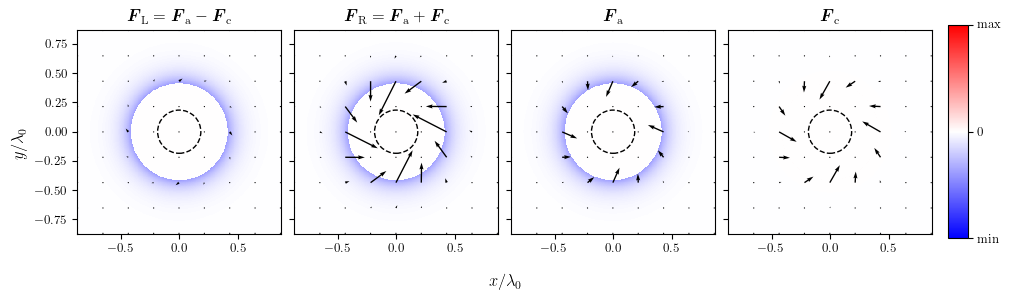

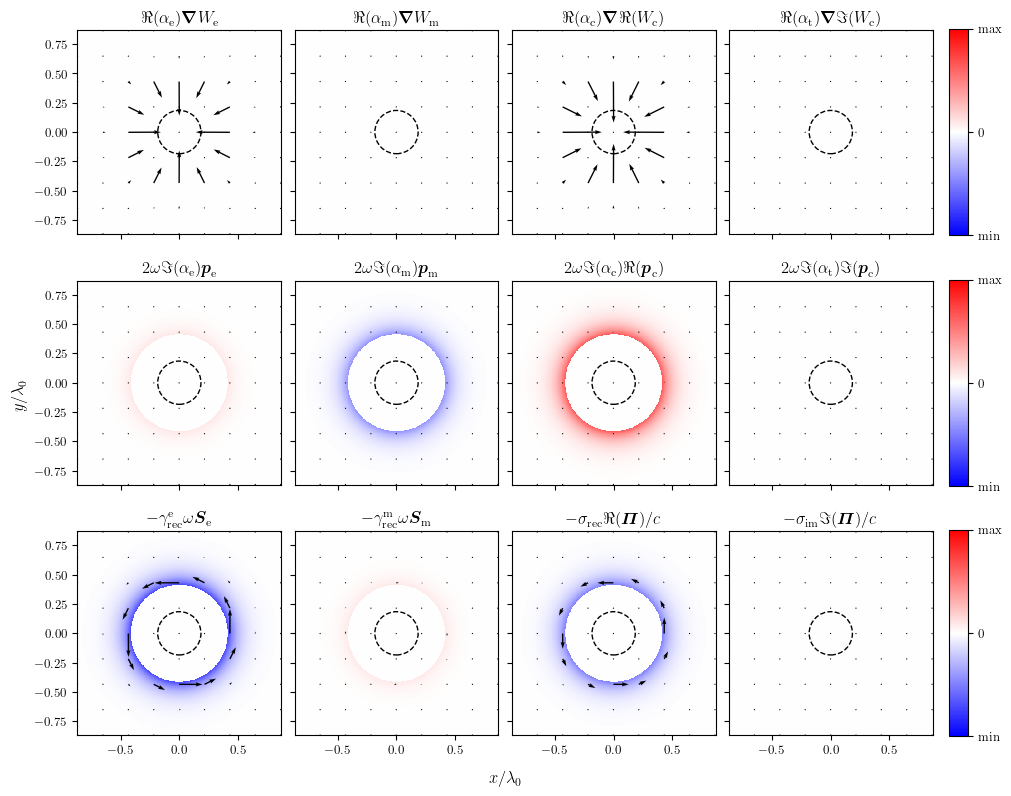

In [5]:
pdfname='circular'
(ϵ,E,μ,H,X,Y,Z)=fields.get(r0,λ0,R=1j,L=0j,resolution=res,window=window,ℓ=ℓ,mode=mode) 
fields.plot_force_per_enantiomer(r0,λ0,α,a,ϵ,μ,E,H,X,Y,Z,zix=1,w=w,arrows=arrows,basis='enantiomer',pdfs=pdfs,pdfname=pdfname)
fields.plot_force_per_enantiomer(r0,λ0,α,a,ϵ,μ,E,H,X,Y,Z,zix=1,w=w,arrows=arrows,basis='e-m-c')

### LP mode


The force calculated for a particle located at
(x,y)=(r₀+a,0): 	Fa⊥ = 269 [fN/mW] 	 Fc⊥ = 218 [fN/mW] 	 Fa∥ = 119 [fN/mW] 	 Fc∥ = 0.00658 [fN/mW]
(x,y)=(r₀+a,0): 	FL⊥ = 346 [fN/mW] 	 FR⊥ = 346 [fN/mW] 	 FL∥ = 119 [fN/mW] 	 FR∥ = 119 [fN/mW]
(x,y)=(0,r₀+a): 	Fa⊥ = 36.4 [fN/mW] 	 Fc⊥ = 14.5 [fN/mW] 	 Fa∥ = 178 [fN/mW] 	 Fc∥ = 0.00118 [fN/mW]
(x,y)=(0,r₀+a): 	FL⊥ = 38.9 [fN/mW] 	 FR⊥ = 39.5 [fN/mW] 	 FL∥ = 178 [fN/mW] 	 FR∥ = 178 [fN/mW]


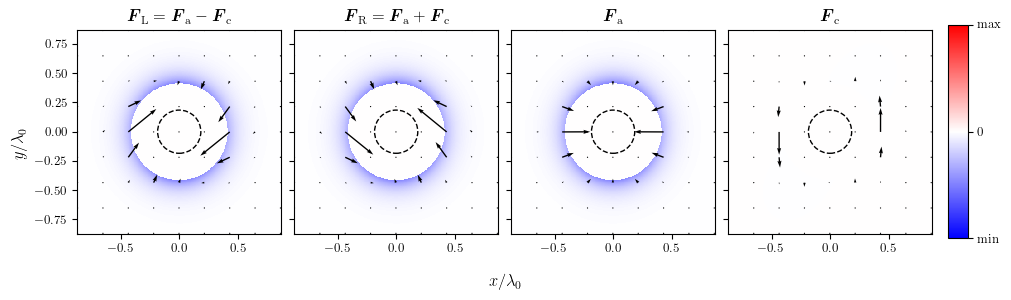

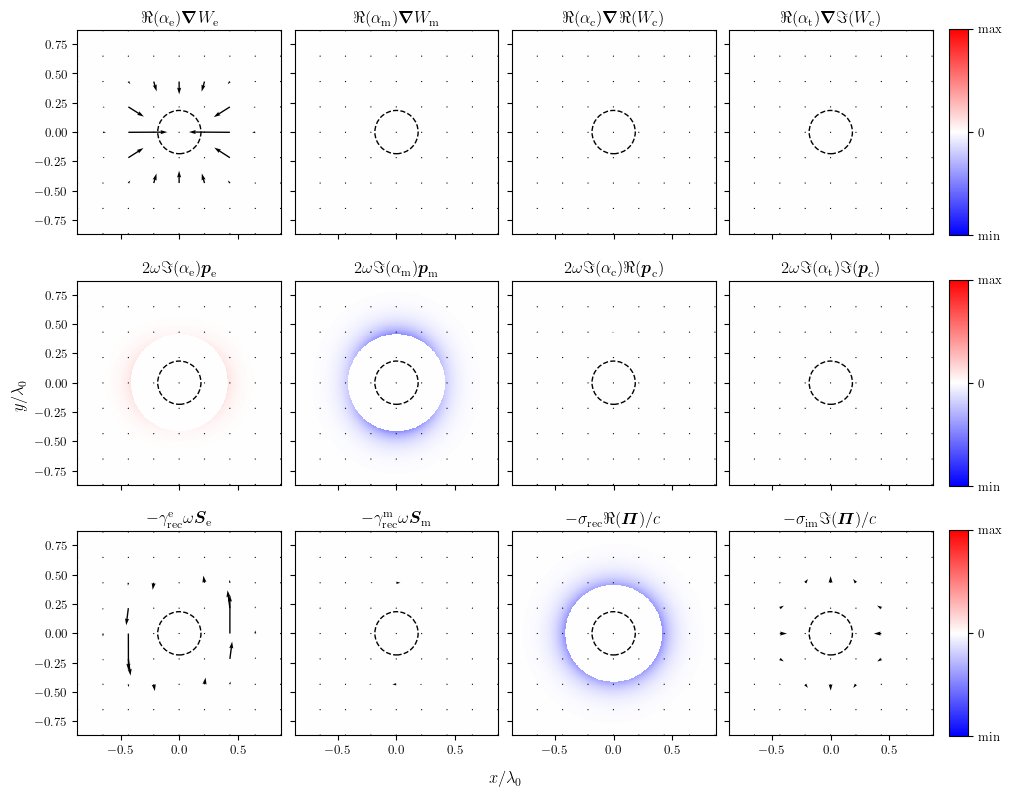

In [6]:
pdfname="linear"
(ϵ,E,μ,H,X,Y,Z)=fields.get(r0,λ0,R=1j,L=-1j,resolution=res,window=window,ℓ=ℓ,mode=mode) 

fields.plot_force_per_enantiomer(r0,λ0,α,a,ϵ,μ,E,H,X,Y,Z,zix=1,w=w,arrows=arrows,basis='enantiomer',pdfs=pdfs,pdfname=pdfname)
fields.plot_force_per_enantiomer(r0,λ0,α,a,ϵ,μ,E,H,X,Y,Z,zix=1,w=w,arrows=arrows,basis='e-m-c')